در این پروژه شما باید با توجه به اطلاعات پزشکی یک بیمار که در ادامه به صورت کامل شرح داده شده است پیش بینی کنید که یک بیمار شانس کمی برای حمله قلبی دارد یا شانس زیادی؟!



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# تنظیم نمایش نمودارها در ژوپیتر
%matplotlib inline

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
def print_data_info(df):
    print("Columns in dataset:", df.columns.tolist())
    print("\nSample data:")
    display(df.head())
    print("\nData info:")
    display(df.info())
    print("Target class distribution:\n", df['output'].value_counts())

def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.show()


In [5]:
def preprocess_data(df):
    df = pd.get_dummies(df, columns=['cp'], prefix='cp', drop_first=True)
    
    scaler = StandardScaler()
    cols_to_scale = ['age', 'trtbps', 'chol', 'thalachh']
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    
    return df
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return accuracy_score(y_test, y_pred)


Columns in dataset: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

Sample data:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

Target class distribution:
 output
1    165
0    138
Name: count, dtype: int64


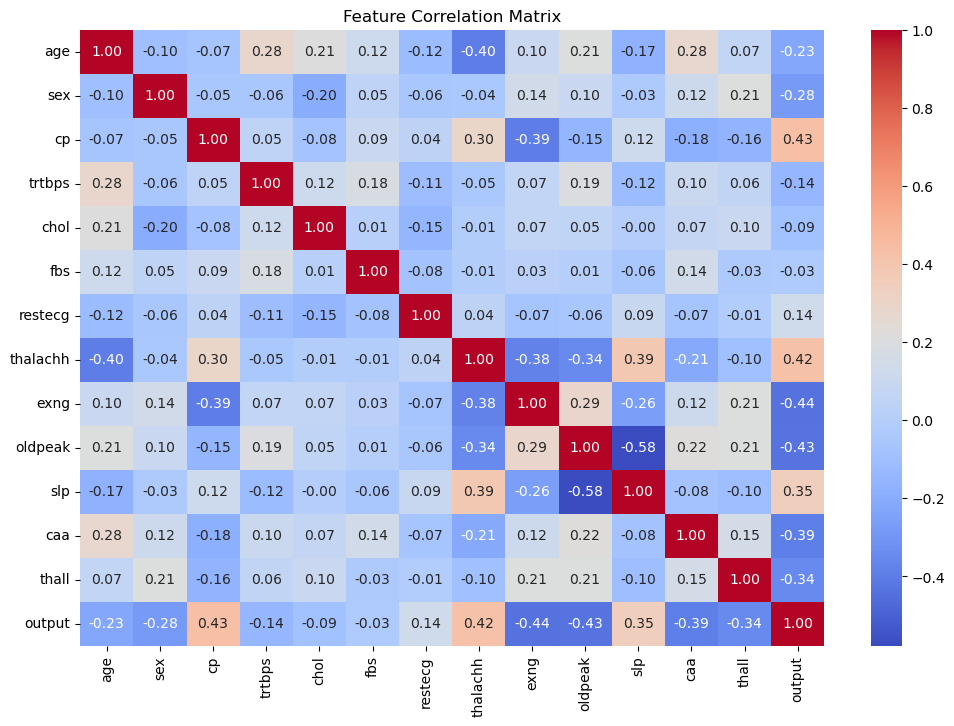

Training samples: 242
Test samples: 61


In [6]:
# بررسی داده‌ها
print_data_info(data)
plot_correlation_matrix(data)

# پیش‌پردازش داده‌ها
data = preprocess_data(data)

# جدا کردن ویژگی‌ها و برچسب‌ها
X = data.drop('output', axis=1)
y = data['output']

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")



Training Logistic Regression...
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



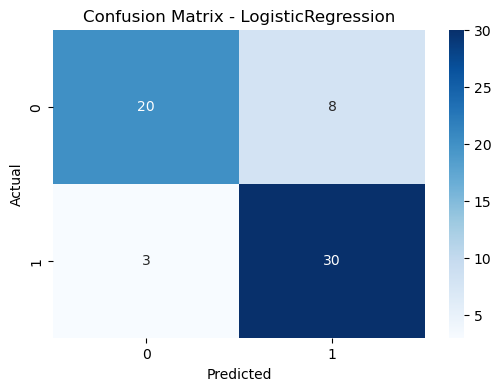


Training Random Forest...
              precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.72      0.88      0.79        33

    accuracy                           0.75        61
   macro avg       0.77      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



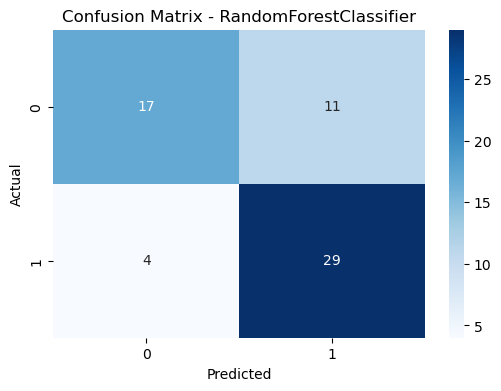


Training SVM...
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



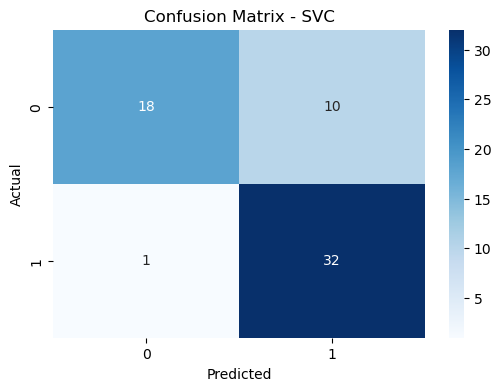


Training KNN...
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



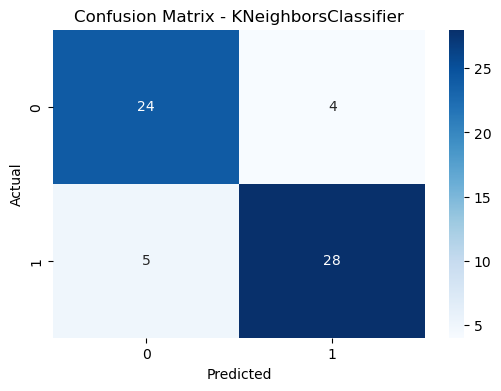

In [7]:
# تعریف و آموزش مدل‌ها
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

accuracies = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    accuracies[model_name] = evaluate_model(model, X_test, y_test)


Model Accuracy Comparison:


,Model,Accuracy
3,KNN,0.852459
0,Logistic Regression,0.819672
2,SVM,0.819672
1,Random Forest,0.754098


C:\Users\Morteza\AppData\Local\Temp\ipykernel_4272\3589081449.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


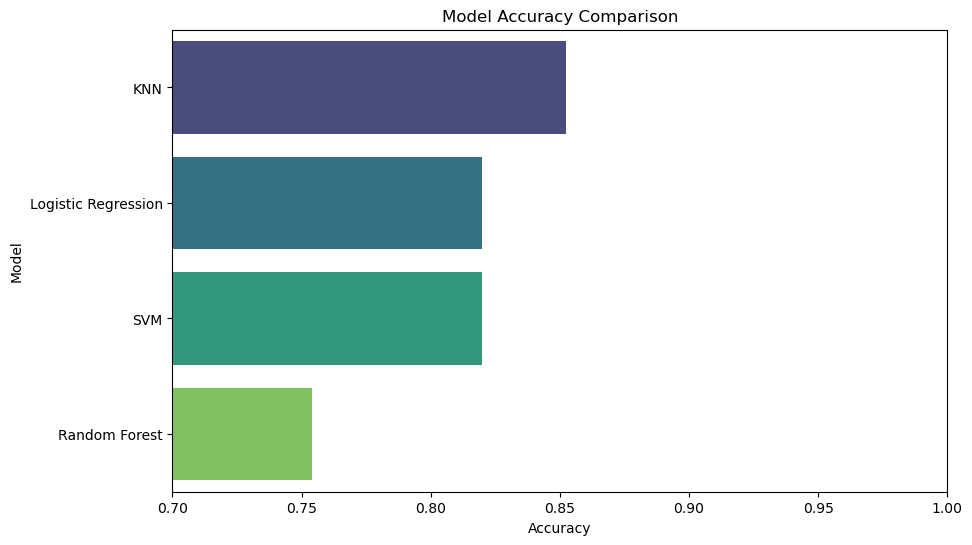

In [8]:
# نمایش نتایج نهایی
results_df = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)
print("\nModel Accuracy Comparison:")
display(results_df)

# رسم نمودار مقایسه
plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0.7, 1.0)
plt.show()